## Example calculations for the Lighthouse Problem from Sivia Chapter 3

In [1]:
%pylab inline
import numpy as np
import scipy.stats
from jupyterthemes import jtplot
import matplotlib as mpl
import matplotlib.pyplot as plt
jtplot.style(theme='grade3')

# Play with these numbers for fun
N = 25
alpha = 1
beta = 1

Populating the interactive namespace from numpy and matplotlib


In [2]:
def LL(x, a, b=beta):
    """Log likelihood"""
    chunk = lambda x: np.log(b**2 + (x-a)**2)
    return -np.sum([chunk(i) for i in x])

def MLE(x_obs, test_a, b=beta):
    """Maximum likelihood estimate"""
    return test_a[np.argmax([LL(x_obs, a) for a in test_a])]

def prior(a, b=beta):
    """Calculation of the prior (uniform)"""
    da = a[-1] - a[0]
    pr = np.ones_like(a) / (0.5 * da * len(a)) 
    return pr

def posterior(x, plot_a, b=beta):
    """Calculation of the posterior distribution"""
    like_sm = lambda xk, a: b/(np.pi*(b**2 + (xk-a)**2))
    lklhd = np.prod(np.array([like_sm(xk, plot_a) for xk in x]), axis=0)
    pr = prior(plot_a)
    return np.multiply(lklhd, pr)

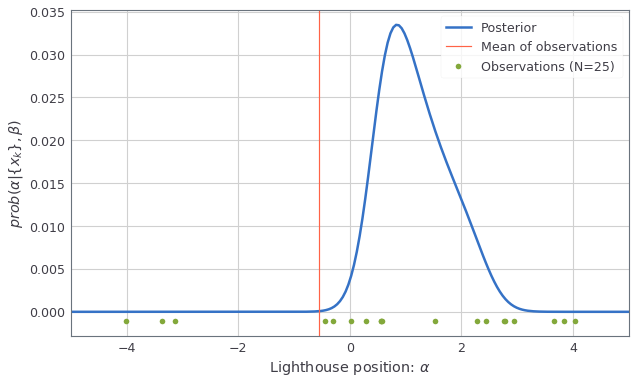

In [3]:

# Observations
x = scipy.stats.cauchy.rvs(size=N, loc=alpha, scale=beta)

# Values of alpha to try
plot_a = np.linspace(-5,5,200)

# Compute the maximum likelihood estimate
mle = MLE(x, plot_a)

# Posterior calculation + normalization
pstr = posterior(x, plot_a)
pstr /= sum(pstr)

# Plot the posterior, observations, and mean of the observations
plt.figure(figsize=(10, 6))
plt.plot(plot_a, pstr, linewidth=2.5, label='Posterior') 
plt.axvline(np.mean(x), color='tomato', label='Mean of observations')
data_height = -np.max(pstr)/30.0
plt.plot(x, np.ones_like(x)*data_height, 'o', label='Observations (N={})'.format(len(x)))
plt.ylabel(r'$prob( \alpha | \{x_k\}, \beta)$')
plt.xlabel(r'Lighthouse position: $\alpha$')
plt.xlim([-5, 5]);
plt.legend()

The maximum likelihood estimate for $\alpha$ was calculated to be {{mle}}, while the true value was {{alpha}}